# Data Exploration

We would like to explore and visualize the data to get some visual insights

# 1. Before applying SMOTE

Let us look at some patterns in the data when the dataset is imbalanced.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import os

cur_dir = os.getcwd()


df = pd.read_csv(cur_dir + '/../data/cleaned_data.csv', low_memory=False)

In [2]:
df

,carrier,origin,dest,air_time,distance,Maximum,Minimum,Average,Departure,Precipitation,New Snow,Snow Depth,days_in_365,sched_time_in_min,delay_class,Precipitation Binary,New Snow Binary,Snow Depth Binary
0,UA,EWR,IAH,227.0,1400,41.0,27.0,34.0,-0.3,0.0,0.0,0,1,315,no,yes,yes,no
1,UA,LGA,IAH,227.0,1416,41.0,27.0,34.0,-2.1,0.0,0.0,0,1,329,no,yes,no,no
2,AA,JFK,MIA,160.0,1089,41.0,27.0,34.0,-0.6,0.0,0.0,0,1,340,no,no,no,no
3,B6,JFK,BQN,183.0,1576,41.0,27.0,34.0,-0.6,0.0,0.0,0,1,345,no,no,no,no
4,DL,LGA,ATL,116.0,762,41.0,27.0,34.0,-2.1,0.0,0.0,0,1,360,no,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328516,B6,JFK,SYR,41.0,209,72.0,52.0,62.0,-1.3,0.0,0.0,0,273,1365,no,no,no,no
328517,B6,JFK,BUF,52.0,301,72.0,52.0,62.0,-1.3,0.0,0.0,0,273,1370,no,no,no,no
328518,B6,JFK,ROC,47.0,264,72.0,52.0,62.0,-1.3,0.0,0.0,0,273,1366,no,no,no,no
328519,B6,JFK,BOS,33.0,187,72.0,52.0,62.0,-1.3,0.0,0.0,0,273,1375,yes,no,no,no


## Columns

The data now has 18 distinct columns. The explanation for each one is given below  


**carrier** - The Flight carrier company  
**origin** - The Origin Airport  
**dest** - The destination airport  
**air_time** - The time in minutes that the flight travelled in air from origin to destination  
**distance** - The distance in miles between the source and destination airports  
**Maximum, Minimum, Average** - The Maximum, Minimum and Average temperatures for the mentioned day  
**Departure** - ?? What does this one mean??  
**Precipitation, New Snow, Snow Depth** - The rain, snow in inches. 'T' for trace value (rained but couldn't measure)  
**Precipitation Binary, New Snow Binary, Snow Depth Binary** - yes where value is Non-Zero (includes yes for 'T')  
**days_in_365** - Day of the year starting from 1 to 365  
**sched_time_in_min** - Scheduled time on a scale of the minutes of the day from 0 to 1439 (24*60 = 1440 minutes in one day)  
**delay_class** - Yes if flight was delayed by more than 10 minutes, no otherwise


In [3]:
df.columns

Index(['carrier', 'origin', 'dest', 'air_time', 'distance', 'Maximum',
       'Minimum', 'Average', 'Departure', 'Precipitation', 'New Snow',
       'Snow Depth', 'days_in_365', 'sched_time_in_min', 'delay_class',
       'Precipitation Binary', 'New Snow Binary', 'Snow Depth Binary'],
      dtype='object')

### 🛫 Number of Flights that got delayed ⏰

As one can observe, the dataset is highly imbalanced.   

The number of flights that got delayed are far less than the ones that did not get delayed

<AxesSubplot: xlabel='delay_class', ylabel='count'>

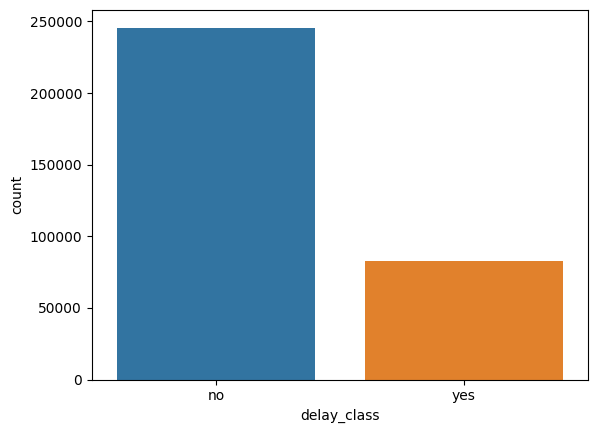

In [4]:
sns.countplot(x=df['delay_class'])

In [6]:
# sns.pairplot(df[df.columns])

### Carrier companies versus flights that got delayed

One can see that certain flight companies like have a greater count of flights that got delayed.

<AxesSubplot: xlabel='delay_class', ylabel='count'>

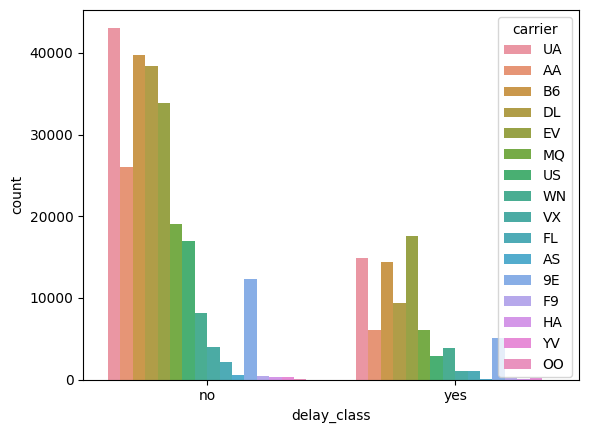

In [9]:
sns.countplot(x=df['delay_class'], hue=df['carrier'])

<AxesSubplot: xlabel='carrier', ylabel='count'>

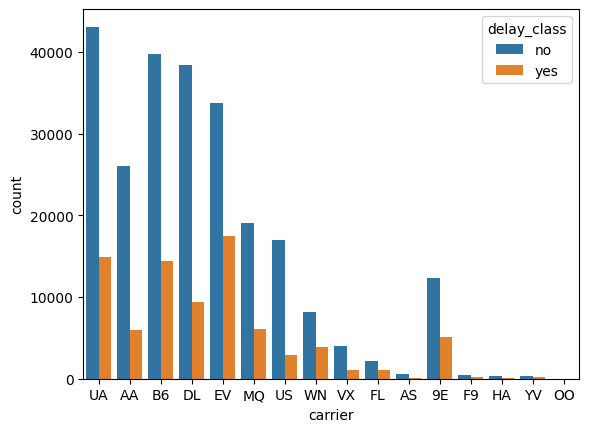

In [10]:
sns.countplot(x=df['carrier'], hue=df['delay_class'])

#### Proportion of flights that got delayed per carrier

The above graphs do not tell us much since it might be the case that the data has more proportion of data for that carrier. 

However, let us take a look at the proportion of flights that got delayed for each carrier.

In [76]:
def get_delayed_proportion(df, param):
    total_flights_per_carrier = df.groupby([param])['delay_class'].count().reset_index().rename(columns={'delay_class':'total_flights'})
    
    delayed_flights_per_carrier = df[df['delay_class']=='yes'].groupby([param])['delay_class'].count().reset_index().rename(columns={'delay_class':'delayed_flights'})
    
    proportion_df = pd.merge(total_flights_per_carrier, delayed_flights_per_carrier, how='inner', on=param)
    
    proportion_df['delayed_proportion'] = [(i/j)*100 for i,j in zip(proportion_df['delayed_flights'], proportion_df['total_flights'])]
    
    return proportion_df

In [77]:
carrier_proportion_df = get_delayed_proportion(df, 'carrier')
carrier_proportion_df

,carrier,total_flights,delayed_flights,delayed_proportion
0,9E,17416,5064,29.076711
1,AA,32093,6012,18.733057
2,AS,712,118,16.573034
3,B6,54169,14454,26.683158
4,DL,47761,9346,19.568267
5,EV,51356,17530,34.134278
6,F9,682,233,34.164223
7,FL,3187,1007,31.597113
8,HA,342,28,8.187135
9,MQ,25163,6084,24.178357


<AxesSubplot: xlabel='carrier', ylabel='delayed_proportion'>

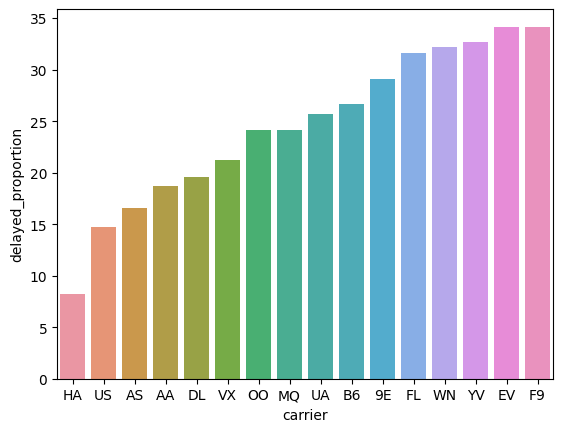

In [78]:
sns.barplot(data=carrier_proportion_df, x="carrier", y="delayed_proportion", 
            order=carrier_proportion_df.sort_values('delayed_proportion').carrier)

As we can see, certain carriers have very high proportion of delayed flights than others

### Delayed flights by source airport

EWR has a slightly higher proportion of delayed flights than the other two airports

In [82]:
origin_airport_proportion_df = get_delayed_proportion(df, 'origin')
origin_airport_proportion_df

,origin,total_flights,delayed_flights,delayed_proportion
0,EWR,117596,33860,28.793496
1,JFK,109416,26631,24.339219
2,LGA,101509,22343,22.010856


<AxesSubplot: xlabel='origin', ylabel='delayed_proportion'>

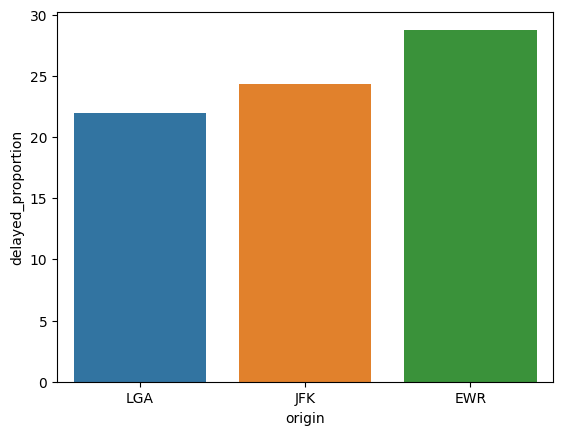

In [83]:
sns.barplot(data=origin_airport_proportion_df, x="origin", y="delayed_proportion", 
            order=origin_airport_proportion_df.sort_values('delayed_proportion').origin)

### Delayed flights by destination airport



In [84]:
dest_airport_proportion_df = get_delayed_proportion(df, 'dest')
dest_airport_proportion_df

,dest,total_flights,delayed_flights,delayed_proportion
0,ABQ,254,87,34.251969
1,ACK,265,57,21.509434
2,ALB,419,168,40.095465
3,ANC,8,2,25.000000
4,ATL,16898,3905,23.109244
...,...,...,...,...
97,TPA,7407,1790,24.166329
98,TUL,299,144,48.160535
99,TVC,96,33,34.375000
100,TYS,579,238,41.105354


<AxesSubplot: xlabel='dest', ylabel='delayed_proportion'>

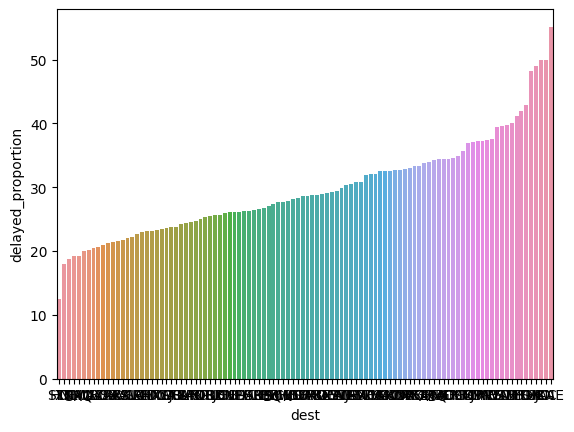

In [85]:
sns.barplot(data=dest_airport_proportion_df, x="dest", y="delayed_proportion", 
            order=dest_airport_proportion_df.sort_values('delayed_proportion').dest)

The graph is messed up, as you can see. 
We would have to certainly group them by larger geographical areas, or something else to get a better insight into whether and how destination airport affects the delay prediction. 

### Average Temperature versus delay

Let us see whether the average temperature seen during the flight day affects the delay by any chance.

In [87]:
df

,carrier,origin,dest,air_time,distance,Maximum,Minimum,Average,Departure,Precipitation,New Snow,Snow Depth,days_in_365,sched_time_in_min,delay_class,Precipitation Binary,New Snow Binary,Snow Depth Binary
0,UA,EWR,IAH,227.0,1400,41.0,27.0,34.0,-0.3,0.0,0.0,0,1,315,no,yes,yes,no
1,UA,LGA,IAH,227.0,1416,41.0,27.0,34.0,-2.1,0.0,0.0,0,1,329,no,yes,no,no
2,AA,JFK,MIA,160.0,1089,41.0,27.0,34.0,-0.6,0.0,0.0,0,1,340,no,no,no,no
3,B6,JFK,BQN,183.0,1576,41.0,27.0,34.0,-0.6,0.0,0.0,0,1,345,no,no,no,no
4,DL,LGA,ATL,116.0,762,41.0,27.0,34.0,-2.1,0.0,0.0,0,1,360,no,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328516,B6,JFK,SYR,41.0,209,72.0,52.0,62.0,-1.3,0.0,0.0,0,273,1365,no,no,no,no
328517,B6,JFK,BUF,52.0,301,72.0,52.0,62.0,-1.3,0.0,0.0,0,273,1370,no,no,no,no
328518,B6,JFK,ROC,47.0,264,72.0,52.0,62.0,-1.3,0.0,0.0,0,273,1366,no,no,no,no
328519,B6,JFK,BOS,33.0,187,72.0,52.0,62.0,-1.3,0.0,0.0,0,273,1375,yes,no,no,no


<AxesSubplot: xlabel='Average', ylabel='Count'>

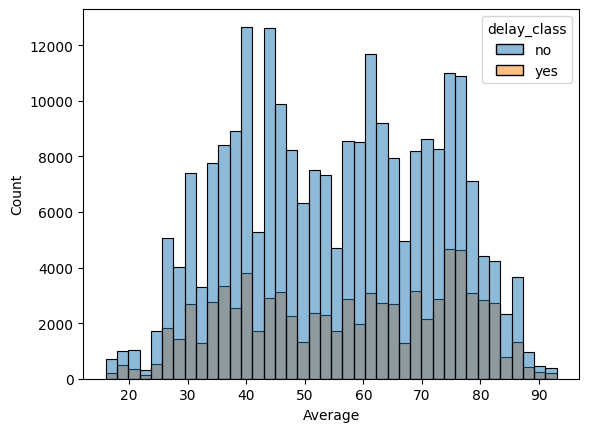

In [95]:
sns.histplot(data=df, x = 'Average', hue='delay_class', bins=40)